In [127]:
import matplotlib as mpl
import pandas as pd
import numpy as np

import seaborn as sns
from scipy.spatial import ConvexHull

import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline
%config InlineBackend.figure_format = 'svg'


In [128]:
#read dataset as df
df_original = pd.read_csv('./MT_Data/edgedata.csv')
df = pd.read_csv('./MT_Data/iteration results/edgedata-13.csv')
df2 = pd.read_csv('./MT_Data/iteration results/edgedata.csv')
df_unqualified = pd.read_csv('./tzzs_data.csv')
#df_original
#df_new_dataset

In [129]:
#get valid data from the dataset
un_zeta = np.array(df_unqualified.Unqualified_nodes_zeta)
un_omega_ratio = np.array(df_unqualified.Unqualified_nodes_omega)
un_df = pd.DataFrame({'new_z':un_zeta,'new_omega':un_omega_ratio})
#un_df
#zeta

In [130]:
#get valid data from the dataset
zeta = np.array(df_original.new_z)
omega_ratio = np.array(df_original.new_omega)
#power = np.array(df_original.power)
#zeta

In [131]:
#get valid data from the dataset
zeta1 = np.array(df.new_z)
omega_ratio1 = np.array(df.new_omega)
#zeta

In [132]:
#get valid data from the dataset
zeta2 = np.array(df2.zeta)
omega_ratio2 = np.array(df2.omega_ratio)
power2 = np.array(df2.power)
#zeta2

In [133]:
#reshape 1D vec -> 2D matrix

#dimension of sz
sz = int(np.sqrt(len(zeta2)))

z = zeta2.reshape(sz,sz)
OR = omega_ratio2.reshape(sz,sz)
P = power2.reshape(sz,sz)
#P

       new_z  new_omega
0   0.285338   0.832693
1   0.392984   0.832693
2   0.392984   0.703318
3   0.392984   0.694893
4   0.455814   0.832693
5   0.455814   0.703318
6   0.455814   0.694893
7   0.455814   0.657259
8   0.580772   0.832693
9   0.580772   0.703318
10  0.580772   0.694893
11  0.580772   0.657259
12  0.580772   0.589127
0   0.010000   0.960000
1   0.052551   0.929501
2   0.063110   0.922508
3   0.077465   0.913160
4   0.091964   0.904039
5   0.101795   0.898324
6   0.120294   0.892274
8   0.173632   0.747272
10  0.260629   0.717008
12  0.316349   0.706636
13  0.341100   0.693409
15  0.435000   0.610000
17  0.485000   0.585000
19  0.713088   0.502769
20  0.844647   0.453425
21  0.985000   0.460000
          new_omega
new_z              
0.010000   0.960000
0.052551   0.929501
0.063110   0.922508
0.077465   0.913160
0.091964   0.904039
0.101795   0.898324
0.120294   0.892274
0.173632   0.747272
0.260629   0.717008
0.285338   0.832693
0.316349   0.706636
0.341100   0.693409


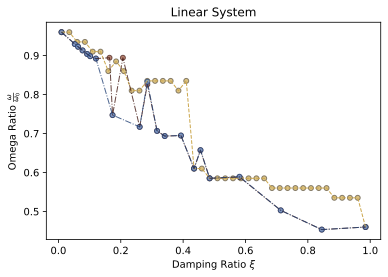

In [134]:
#change the textlabel
#combine the plot
Prj_z = []
Prj_omega = []

plt.xlabel( r"Damping Ratio $\xi$")
plt.ylabel(r"Omega Ratio $\frac{\omega}{\omega_{0}}$")
plt.title('Linear System')

#colors_palatte = ['#6a6b62','#64655c','#707168','#7b7d73','#75776d','#87897f','#818379','#8d8f85','#989b90','#92958a','#9ea096','#a4a69c','#a9aca1','#afb2a7','#b5b8ad','#bbbeb3','#cac4b9','#c6cab3','#ccd0c4','#d2d6ca']
#my_cmap=mpl.colors.ListedColormap(colors_palatte)
#plt.cm.register_cmap(name='mycmp',cmap=my_cmap)

#p_im = plt.contourf(z,OR,P,cmap =plt.cm.get_cmap('mycmp'),alpha=0.6)

for i in range(0,sz):
    for j in range(0,sz):
        if abs(P[i,j]) <= 0.025:
            if OR[i,j]>0.4:
                if z[i,j]<=1:
                    Prj_z = np.append(Prj_z,z[i,j])
                    Prj_omega = np.append(Prj_omega,OR[i,j])

df_zOR = pd.DataFrame({'new_z':Prj_z,'new_omega':Prj_omega })
edge_df = df_zOR.groupby('new_z').min('new_omega')

#edge_df.to_csv('edgedata.csv', index='False')

df_zOR_new_needcorr = pd.concat([df_zOR,df])
df_zOR_new = pd.concat([df_zOR_new_needcorr,un_df,un_df]).drop_duplicates(keep=False)
edge_df_new = df_zOR_new.groupby('new_z').min('new_omega')
edge_df_new.to_csv('.\MT_Data/iteration results\edgedata-.csv', index='False')

#edge_Df
z_coord = zeta
z_coord1 = zeta1
z_coord2 = np.array(edge_df_new.index)

#z_cood
omega_coord = omega_ratio
omega_coord1 = omega_ratio1
omega_coord2 = np.array(edge_df_new.new_omega)

print(df_zOR_new)
print(edge_df_new)

edge_im = plt.scatter(z_coord, omega_coord, c="#cba74e" ,edgecolor = "#5b503f", alpha=0.7, marker = '.',s = 100)
edge_lane=plt.plot(z_coord, omega_coord,c= "#cba74e",alpha=1, linewidth=1,linestyle = 'dashed')

edge_im1 = plt.scatter(z_coord1, omega_coord1, c="#984d36" ,edgecolor = "#411812", alpha=0.7, marker = '.',s = 100)
edge_lane1=plt.plot(z_coord1, omega_coord1,c= "#411812",alpha=0.8, linewidth=1,linestyle = 'dashdot')

edge_im2 = plt.scatter(z_coord2, omega_coord2, c="#6ba0e2" ,edgecolor = "#234175", alpha=0.7, marker = '.',s = 100)
edge_lane2=plt.plot(z_coord2, omega_coord2,c= "#234175",alpha=0.8, linewidth=1,linestyle = 'dashdot')

#plt.savefig('edge_extension_2st_iter.svg',format='svg',dpi=600)
plt.show()